This notebook makes use of the translated/cleaned dataset: https://www.kaggle.com/kerneler/starter-jigsaw-toxic-comment-classific-e0420f1a-7. Let's see how far we can get just using Tensorflow 2 and Keras Preprocessing Layers, without bringing in more heavy-duty stuff like BERT.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/jigsaw-toxic-comment-classification-cleaned-data/train_data.csv
/kaggle/input/jigsaw-toxic-comment-classification-cleaned-data/test_data.csv
/kaggle/input/jigsaw-toxic-comment-classification-cleaned-data/val_data.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/validation.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test-processed-seqlen128.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-toxic-comment-train.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/test.csv
/kaggle/input/jigsaw-multilingual-toxic-comment-classification/jigsaw-unintended-bias-train-processed-seqlen128.csv
/kaggle/i

In [2]:
train= pd.read_csv("../input/jigsaw-toxic-comment-classification-cleaned-data/train_data.csv")
val = pd.read_csv("../input/jigsaw-toxic-comment-classification-cleaned-data/val_data.csv")
print(len(train), len(val))

221099 8000


In [3]:
train.columns.values

array(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'lang_code', 'lang_name', 'country',
       'label', 'cleaned_text', 'neg_pol', 'neutral_pol', 'pos_pol',
       'compound_pol', 'comment_len'], dtype=object)

In [4]:
val.columns.values

array(['id', 'comment_text', 'lang', 'toxic', 'lang_name', 'country',
       'translated_comment', 'cleaned_text', 'neg_pol', 'neutral_pol',
       'pos_pol', 'compound_pol', 'comment_len'], dtype=object)

In [5]:
translated_test = pd.read_csv("../input/jigsaw-toxic-comment-classification-cleaned-data/test_data.csv")
test = pd.read_csv("../input/jigsaw-multilingual-toxic-comment-classification/test.csv")
print(len(translated_test), len(test))

63812 63812


In [6]:
translated_test.head()

,id,content,lang,lang_name,country,translated_comment,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr,Turkish,Turkey,Title named Doctor Who wiki 12. doctor has add...,title named doctor who wiki doctor has added h...,0.000,0.912,0.088,0.4019,29
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru,Russian,Russia,"It is possible, but I don't see the need to a...",it is possible but i do not see the need to al...,0.000,0.823,0.177,0.9620,92
2,2,"Quindi tu sei uno di quelli conservativi , ...",it,Italian,Italy,"Then you're one of those conservative , who wo...",then you are one of those conservative who wou...,0.079,0.797,0.124,0.4041,54
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr,Turkish,Turkey,"Unfortunately, it was not performed, but had s...",unfortunately it was not performed but had som...,0.031,0.762,0.207,0.9806,120
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr,Turkish,Turkey,:Resim:Seldabagcan.jpg the image of the source...,resim seldabagcan jpg the image of the source ...,0.040,0.870,0.090,0.8758,245


In [7]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,lang_code,lang_name,country,label,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,en,English,United Kingdom,0,explanation why the edits made under my userna...,0.000,0.905,0.095,0.5574,46
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,en,English,United Kingdom,0,d aww he matches this background colour i am s...,0.106,0.741,0.153,0.2263,16
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,en,English,United Kingdom,0,hey man i am really not trying to edit war it ...,0.079,0.855,0.065,-0.1779,44
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,en,English,United Kingdom,0,more i can not make any real suggestions on im...,0.054,0.870,0.076,0.4019,116
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,en,English,United Kingdom,0,you sir are my hero any chance you remember wh...,0.000,0.682,0.318,0.6808,14


There are some values in the translated test set that are null, so I'm going to set those to a "dummy" value so that the model doesn't mess up. And, I'll remove null values from the training set.

In [8]:
val.head()

,id,comment_text,lang,toxic,lang_name,country,translated_comment,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len
0,0,Este usuario ni siquiera llega al rango de ...,es,0,Spanish; Castilian,Spain,This user does not even make it to the rank of...,this user does not even make it to the rank of...,0.000,0.853,0.147,0.7506,39
1,1,Il testo di questa voce pare esser scopiazzato...,it,0,Italian,Italy,The text of this entry appears to be like I di...,the text of this entry appears to be like i di...,0.000,0.898,0.102,0.3612,23
2,2,Vale. Sólo expongo mi pasado. Todo tiempo pasa...,es,1,Spanish; Castilian,Spain,It is worth it. Only expose my past. All time ...,it is worth it only expose my past all time pa...,0.158,0.726,0.116,-0.1833,35
3,3,Bu maddenin alt başlığı olarak uluslararası i...,tr,0,Turkish,Turkey,Of this article as a sub-heading with maintain...,of this article as a sub heading with maintain...,0.095,0.866,0.038,-0.4417,63
4,4,Belçika nın şehirlerinin yanında ilçe ve belde...,tr,0,Turkish,Turkey,"I guess while they're At of the city, district...",i guess while they are at of the city district...,0.028,0.929,0.042,0.0387,80


In [9]:
dummy = train.cleaned_text.values[0]

In [10]:
translated_test[pd.isnull(translated_test.cleaned_text)]

,id,content,lang,lang_name,country,translated_comment,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len
1607,1607,[[No Brasil a escravatura foi uma forma de tr...,pt,Portuguese,Portugal,"[[In Brazil, the slave trade was a form of wo...",NaN,0.0,0.0,0.0,0.0,0
3206,3206,|200501= |200502= |200503= |200504= |200505= |...,fr,French,France,|200501= |200502= |200503= |200504= |200505= |...,NaN,0.0,0.0,0.0,0.0,0
8157,8157,501 — 502 — 503 — 504 — 505 — 506 — 507 — 508 ...,ru,Russian,Russia,501 — 502 — 503 — 504 — 505 — 506 — 507 — 508 ...,NaN,0.0,0.0,0.0,0.0,0
11562,11562,06-09 193474 06-10 190206 06-11 186760 06-12 1...,fr,French,France,06-09 193474 06-10 190206 06-11 186760 06-12 1...,NaN,0.0,0.0,0.0,0.0,0
19061,19061,1896 1897 1902 1903 1904 1905 1906 1907 1908 ...,fr,French,France,1896 1897 1902 1903 1904 1905 1906 1907 1908 ...,NaN,0.0,0.0,0.0,0.0,0
23787,23787,"[[Archivo: == Linsay lohan es una perra, es...",es,Spanish; Castilian,Spain,"[[File: == Linsay lohan is a bitch, is a vague...",NaN,0.0,0.0,0.0,0.0,0
29566,29566,23-4-2000 15-4-2001 31-3-2002 20-4-2003 11-4-2...,pt,Portuguese,Portugal,23-4-2000 15-4-2001 31-3-2002 20-4-2003 11-4-2...,NaN,0.0,0.0,0.0,0.0,0
29990,29990,06-22 174449 06-23 174432 06-24 174430 06-25 1...,fr,French,France,06-22 174449 06-23 174432 06-24 174430 06-25 1...,NaN,0.0,0.0,0.0,0.0,0
35415,35415,"[*Euh, l ajout dit bien « sans s en rendre com...",fr,French,France,"[*Uh, the add says it well "" without realizing...",NaN,0.0,0.0,0.0,0.0,0
38768,38768,[[Media:[[Imagen: Hey vatos pues mi nom...,es,Spanish; Castilian,Spain,[[Media:[[Image: Hey dudes my name is sergio h...,NaN,0.0,0.0,0.0,0.0,0


In [11]:
translated_test.cleaned_text[pd.isnull(translated_test.cleaned_text)] = dummy
translated_test[pd.isnull(translated_test.cleaned_text)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,id,content,lang,lang_name,country,translated_comment,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len


In [12]:
train = train[pd.notnull(train.cleaned_text)]

In [13]:
len(train[train.toxic == 0])

199660

In [14]:
len(train[train.toxic == 1])

21378

In [15]:
new_train = pd.concat((train[train.toxic == 1], train[train.toxic == 0].sample(100000)))

In [16]:
len(new_train)

121378

In [17]:
import tensorflow as tf

vocab_size = 50000
max_length = 192

In [18]:
train_vals = train[['toxic']]
val_vals = val[['toxic']]
train_vals

,toxic
0,0
1,0
2,0
3,0
4,0
...,...
221094,0
221095,0
221096,0
221097,1


In [19]:
len(val_vals)

8000

Instead of tokenizing the text manually, I'm going use the keras text vectorization layer. This way, we can feed the text directly into the model. For more information, see https://www.tensorflow.org/api_docs/python/tf/keras/layers/experimental/preprocessing/TextVectorization

In [20]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

vectorize_layer = TextVectorization(
 max_tokens=vocab_size,
 output_mode='int',
 output_sequence_length=max_length)

vectorize_layer.adapt(np.concatenate((train.cleaned_text.values, val.cleaned_text.values, translated_test.cleaned_text.values)))

In [21]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, GRU, GlobalMaxPooling1D
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras import Input

# loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# def create_model():
#     model = Sequential()
#     model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
#     model.add(vectorize_layer)
#     model.add(Embedding(vocab_size + 1, 64, input_length = max_length))
#     model.add(Bidirectional(LSTM(20, return_sequences = True)))
#     model.add(Bidirectional(LSTM(20, return_sequences = True)))
#     model.add(GlobalMaxPooling1D())
#     model.add(Dense(1, activation='sigmoid'))
#     model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(0.00005), metrics=['accuracy'])
#     return model
# #model.summary()
# model = create_model()

In [22]:
# history = model.fit(new_train.cleaned_text.values[::10],new_train.toxic.values[::10], epochs = 10, verbose = 1, 
#                     validation_data = (val.cleaned_text.values[::10], val_vals.values[::10]),
#                    callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

I'm going to use KerasTuner to find the optimal model for this data. For more information, visit: https://keras-team.github.io/keras-tuner/

In [23]:
!pip install -U keras-tuner

     |████████████████████████████████| 54 kB 1.6 MB/s 
  Created wheel for keras-tuner: filename=keras_tuner-1.0.1-py3-none-any.whl size=73198 sha256=c38bee26564fd927cc52e4bed3566820619b665112a8129652bfc791c0e9da68
  Stored in directory: /root/.cache/pip/wheels/0b/cf/2f/1a1749d3a3650fac3305a8d7f9237b6de7c41068e2f8520ca2
  Created wheel for terminaltables: filename=terminaltables-3.1.0-py3-none-any.whl size=15354 sha256=83c24fc2a7b7176edccf193ec0f9301a944226f748db52eee2a482e6539d5010
  Stored in directory: /root/.cache/pip/wheels/ba/ad/c8/2d98360791161cd3db6daf6b5e730f34021fc9367d5879f497
Successfully built keras-tuner terminaltables
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Dropout, GRU, GlobalMaxPooling1D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input
import kerastuner as kt

loss = tf.keras.losses.BinaryCrossentropy(from_logits=True)

def create_model(hp):
    model = Sequential()
    model.add(tf.keras.Input(shape=(1,), dtype=tf.string))
    model.add(vectorize_layer)
    model.add(Embedding(vocab_size + 1, hp.Int('units', min_value = 5, max_value = 200, step = 25), input_length = max_length))
#     model.add(tf.keras.layers.Conv1D(hp.Int('units', min_value = 5, max_value = 200, step = 25), 5, activation='relu'))
#     model.add(tf.keras.layers.GlobalMaxPooling1D())
    model.add(Bidirectional(LSTM(hp.Int('units', min_value = 5, max_value = 200, step = 25), return_sequences = True)))
    model.add(Bidirectional(LSTM(hp.Int('units', min_value = 5, max_value = 200, step = 25), return_sequences = True)))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(1, activation='sigmoid'))
    hp_learning_rate = hp.Choice('learning_rate', values = [1e-4, 5e-5, 1e-5]) 
    model.compile(loss='binary_crossentropy', optimizer = tf.keras.optimizers.Adam(hp_learning_rate), metrics=['accuracy'])
    return model
#model.summary()

tuner = kt.Hyperband(create_model,
                     objective = 'val_accuracy', 
                     max_epochs = 15,
                     factor = 3)     

tuner.search(new_train.cleaned_text.values[::100],new_train.toxic.values[::100], epochs = 10,verbose = 2,
             validation_data = (val.cleaned_text.values[::100], val_vals.values[::100]), callbacks=[tf.keras.callbacks.EarlyStopping('val_loss', patience=3)])


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 11s - loss: 0.6723 - accuracy: 0.8237 - val_loss: 0.6590 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 2s - loss: 0.6341 - accuracy: 0.8237 - val_loss: 0.6154 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 9s - loss: 0.6851 - accuracy: 0.8237 - val_loss: 0.6824 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 3s - loss: 0.6761 - accuracy: 0.8237 - val_loss: 0.6741 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 13s - loss: 0.5767 - accuracy: 0.8048 - val_loss: 0.5377 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 7s - loss: 0.4862 - accuracy: 0.8237 - val_loss: 0.5377 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 7s - loss: 0.6917 - accuracy: 0.7405 - val_loss: 0.6902 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 2s - loss: 0.6882 - accuracy: 0.8237 - val_loss: 0.6870 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 13s - loss: 0.6391 - accuracy: 0.7694 - val_loss: 0.5689 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 7s - loss: 0.5003 - accuracy: 0.8237 - val_loss: 0.5377 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 8s - loss: 0.6822 - accuracy: 0.7455 - val_loss: 0.6699 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 2s - loss: 0.6483 - accuracy: 0.8237 - val_loss: 0.6290 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 8s - loss: 0.6941 - accuracy: 0.4061 - val_loss: 0.6914 - val_accuracy: 0.7375
Epoch 2/2
1214/1214 - 3s - loss: 0.6886 - accuracy: 0.8196 - val_loss: 0.6866 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 10s - loss: 0.5765 - accuracy: 0.8237 - val_loss: 0.5555 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 5s - loss: 0.4869 - accuracy: 0.8237 - val_loss: 0.5350 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 10s - loss: 0.6835 - accuracy: 0.7677 - val_loss: 0.6759 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 4s - loss: 0.6649 - accuracy: 0.8237 - val_loss: 0.6582 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 10s - loss: 0.6622 - accuracy: 0.8204 - val_loss: 0.6336 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 3s - loss: 0.5645 - accuracy: 0.8237 - val_loss: 0.5341 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 9s - loss: 0.6918 - accuracy: 0.5535 - val_loss: 0.6856 - val_accuracy: 0.7625
Epoch 2/2
1214/1214 - 4s - loss: 0.6781 - accuracy: 0.8229 - val_loss: 0.6734 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/2
1214/1214 - 8s - loss: 0.6344 - accuracy: 0.8229 - val_loss: 0.5668 - val_accuracy: 0.7750
Epoch 2/2
1214/1214 - 3s - loss: 0.4953 - accuracy: 0.8237 - val_loss: 0.5418 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 3/5
1214/1214 - 8s - loss: 0.6683 - accuracy: 0.8237 - val_loss: 0.6540 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 2s - loss: 0.6255 - accuracy: 0.8237 - val_loss: 0.6053 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 2s - loss: 0.5440 - accuracy: 0.8237 - val_loss: 0.5344 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 3/5
1214/1214 - 9s - loss: 0.6836 - accuracy: 0.8245 - val_loss: 0.6803 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 3s - loss: 0.6739 - accuracy: 0.8237 - val_loss: 0.6715 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 3s - loss: 0.6636 - accuracy: 0.8237 - val_loss: 0.6618 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 3/5
1214/1214 - 13s - loss: 0.5569 - accuracy: 0.8237 - val_loss: 0.5409 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 7s - loss: 0.4880 - accuracy: 0.8237 - val_loss: 0.5412 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 6s - loss: 0.4796 - accuracy: 0.8237 - val_loss: 0.5383 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 3/5
1214/1214 - 7s - loss: 0.6995 - accuracy: 0.1755 - val_loss: 0.6972 - val_accuracy: 0.2250
Epoch 4/5
1214/1214 - 2s - loss: 0.6961 - accuracy: 0.1936 - val_loss: 0.6942 - val_accuracy: 0.3750
Epoch 5/5
1214/1214 - 2s - loss: 0.6928 - accuracy: 0.5502 - val_loss: 0.6913 - val_accuracy: 0.7500


Train on 1214 samples, validate on 80 samples
Epoch 6/15
1214/1214 - 8s - loss: 0.6841 - accuracy: 0.6829 - val_loss: 0.6697 - val_accuracy: 0.7750
Epoch 7/15
1214/1214 - 3s - loss: 0.6455 - accuracy: 0.8237 - val_loss: 0.6246 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 2s - loss: 0.5669 - accuracy: 0.8237 - val_loss: 0.5416 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 2s - loss: 0.4906 - accuracy: 0.8237 - val_loss: 0.5401 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 2s - loss: 0.4844 - accuracy: 0.8237 - val_loss: 0.5381 - val_accuracy: 0.7750
Epoch 11/15
1214/1214 - 2s - loss: 0.4809 - accuracy: 0.8237 - val_loss: 0.5405 - val_accuracy: 0.7750
Epoch 12/15
1214/1214 - 2s - loss: 0.4795 - accuracy: 0.8237 - val_loss: 0.5411 - val_accuracy: 0.7750
Epoch 13/15
1214/1214 - 2s - loss: 0.4752 - accuracy: 0.8237 - val_loss: 0.5382 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 6/15
1214/1214 - 8s - loss: 0.6994 - accuracy: 0.1771 - val_loss: 0.6950 - val_accuracy: 0.2625
Epoch 7/15
1214/1214 - 3s - loss: 0.6904 - accuracy: 0.6722 - val_loss: 0.6866 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 3s - loss: 0.6808 - accuracy: 0.8221 - val_loss: 0.6777 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 3s - loss: 0.6701 - accuracy: 0.8237 - val_loss: 0.6674 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 3s - loss: 0.6576 - accuracy: 0.8237 - val_loss: 0.6551 - val_accuracy: 0.7750
Epoch 11/15
1214/1214 - 3s - loss: 0.6422 - accuracy: 0.8237 - val_loss: 0.6399 - val_accuracy: 0.7750
Epoch 12/15
1214/1214 - 3s - loss: 0.6226 - accuracy: 0.8237 - val_loss: 0.6200 - val_accuracy: 0.7750
Epoch 13/15
1214/1214 - 3s - loss: 0.5971 - accuracy: 0.8237 - val_loss: 0.5946 - val_accuracy: 0.7750
Epoch 14/15
1214/1214 - 3s - loss: 0.5643 - accuracy: 0.8237 - val_loss: 0.5646 - val_accuracy: 0.7750
Epoch 15/15
1214/1214 - 3s - lo

Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 10s - loss: 0.6935 - accuracy: 0.4646 - val_loss: 0.6843 - val_accuracy: 0.7625
Epoch 2/5
1214/1214 - 5s - loss: 0.6725 - accuracy: 0.8155 - val_loss: 0.6633 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 5s - loss: 0.6467 - accuracy: 0.8237 - val_loss: 0.6369 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 5s - loss: 0.6123 - accuracy: 0.8237 - val_loss: 0.6024 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 5s - loss: 0.5648 - accuracy: 0.8237 - val_loss: 0.5572 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 12s - loss: 0.6850 - accuracy: 0.7175 - val_loss: 0.6733 - val_accuracy: 0.7750
Epoch 2/5
1214/1214 - 7s - loss: 0.6572 - accuracy: 0.8237 - val_loss: 0.6453 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 7s - loss: 0.6196 - accuracy: 0.8237 - val_loss: 0.6058 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 6s - loss: 0.5660 - accuracy: 0.8237 - val_loss: 0.5534 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 6s - loss: 0.5082 - accuracy: 0.8237 - val_loss: 0.5354 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 8s - loss: 0.6750 - accuracy: 0.7076 - val_loss: 0.6482 - val_accuracy: 0.7750
Epoch 2/5
1214/1214 - 2s - loss: 0.5834 - accuracy: 0.8237 - val_loss: 0.5357 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 2s - loss: 0.4840 - accuracy: 0.8237 - val_loss: 0.5450 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 2s - loss: 0.4739 - accuracy: 0.8237 - val_loss: 0.5404 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 2s - loss: 0.4694 - accuracy: 0.8237 - val_loss: 0.5400 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 9s - loss: 0.5810 - accuracy: 0.8237 - val_loss: 0.5463 - val_accuracy: 0.7750
Epoch 2/5
1214/1214 - 3s - loss: 0.4891 - accuracy: 0.8237 - val_loss: 0.5355 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 3s - loss: 0.4823 - accuracy: 0.8237 - val_loss: 0.5409 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 3s - loss: 0.4763 - accuracy: 0.8237 - val_loss: 0.5406 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 3s - loss: 0.4715 - accuracy: 0.8237 - val_loss: 0.5331 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 9s - loss: 0.5906 - accuracy: 0.8237 - val_loss: 0.5543 - val_accuracy: 0.7750
Epoch 2/5
1214/1214 - 4s - loss: 0.4887 - accuracy: 0.8237 - val_loss: 0.5423 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 4s - loss: 0.4788 - accuracy: 0.8237 - val_loss: 0.5521 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 4s - loss: 0.4606 - accuracy: 0.8237 - val_loss: 0.5383 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 4s - loss: 0.4200 - accuracy: 0.8237 - val_loss: 0.5664 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/5
1214/1214 - 10s - loss: 0.6412 - accuracy: 0.8229 - val_loss: 0.5915 - val_accuracy: 0.7750
Epoch 2/5
1214/1214 - 4s - loss: 0.5144 - accuracy: 0.8237 - val_loss: 0.5441 - val_accuracy: 0.7750
Epoch 3/5
1214/1214 - 4s - loss: 0.4878 - accuracy: 0.8237 - val_loss: 0.5352 - val_accuracy: 0.7750
Epoch 4/5
1214/1214 - 4s - loss: 0.4857 - accuracy: 0.8237 - val_loss: 0.5434 - val_accuracy: 0.7750
Epoch 5/5
1214/1214 - 4s - loss: 0.4830 - accuracy: 0.8237 - val_loss: 0.5414 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 6/15
1214/1214 - 10s - loss: 0.6814 - accuracy: 0.8105 - val_loss: 0.6725 - val_accuracy: 0.7750
Epoch 7/15
1214/1214 - 5s - loss: 0.6585 - accuracy: 0.8237 - val_loss: 0.6504 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 4s - loss: 0.6306 - accuracy: 0.8237 - val_loss: 0.6213 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 5s - loss: 0.5906 - accuracy: 0.8237 - val_loss: 0.5804 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 5s - loss: 0.5371 - accuracy: 0.8237 - val_loss: 0.5388 - val_accuracy: 0.7750
Epoch 11/15
1214/1214 - 5s - loss: 0.4976 - accuracy: 0.8237 - val_loss: 0.5366 - val_accuracy: 0.7750
Epoch 12/15
1214/1214 - 4s - loss: 0.4918 - accuracy: 0.8237 - val_loss: 0.5387 - val_accuracy: 0.7750
Epoch 13/15
1214/1214 - 4s - loss: 0.4911 - accuracy: 0.8237 - val_loss: 0.5379 - val_accuracy: 0.7750
Epoch 14/15
1214/1214 - 5s - loss: 0.4904 - accuracy: 0.8237 - val_loss: 0.5384 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 6/15
1214/1214 - 13s - loss: 0.6833 - accuracy: 0.7727 - val_loss: 0.6727 - val_accuracy: 0.7750
Epoch 7/15
1214/1214 - 6s - loss: 0.6580 - accuracy: 0.8237 - val_loss: 0.6471 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 6s - loss: 0.6230 - accuracy: 0.8237 - val_loss: 0.6099 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 6s - loss: 0.5697 - accuracy: 0.8237 - val_loss: 0.5567 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 6s - loss: 0.5118 - accuracy: 0.8237 - val_loss: 0.5357 - val_accuracy: 0.7750
Epoch 11/15
1214/1214 - 7s - loss: 0.4939 - accuracy: 0.8237 - val_loss: 0.5369 - val_accuracy: 0.7750
Epoch 12/15
1214/1214 - 6s - loss: 0.4929 - accuracy: 0.8237 - val_loss: 0.5373 - val_accuracy: 0.7750
Epoch 13/15
1214/1214 - 6s - loss: 0.4921 - accuracy: 0.8237 - val_loss: 0.5371 - val_accuracy: 0.7750


Train on 1214 samples, validate on 80 samples
Epoch 1/15
1214/1214 - 8s - loss: 0.6641 - accuracy: 0.8237 - val_loss: 0.6442 - val_accuracy: 0.7750
Epoch 2/15
1214/1214 - 3s - loss: 0.5911 - accuracy: 0.8237 - val_loss: 0.5507 - val_accuracy: 0.7750
Epoch 3/15
1214/1214 - 3s - loss: 0.4951 - accuracy: 0.8237 - val_loss: 0.5424 - val_accuracy: 0.7750
Epoch 4/15
1214/1214 - 3s - loss: 0.4869 - accuracy: 0.8237 - val_loss: 0.5402 - val_accuracy: 0.7750
Epoch 5/15
1214/1214 - 3s - loss: 0.4851 - accuracy: 0.8237 - val_loss: 0.5405 - val_accuracy: 0.7750
Epoch 6/15
1214/1214 - 3s - loss: 0.4812 - accuracy: 0.8237 - val_loss: 0.5396 - val_accuracy: 0.7750
Epoch 7/15
1214/1214 - 3s - loss: 0.4791 - accuracy: 0.8237 - val_loss: 0.5380 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 3s - loss: 0.4766 - accuracy: 0.8237 - val_loss: 0.5387 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 3s - loss: 0.4732 - accuracy: 0.8237 - val_loss: 0.5405 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 3s - loss: 0

Train on 1214 samples, validate on 80 samples
Epoch 1/15
1214/1214 - 11s - loss: 0.6231 - accuracy: 0.8237 - val_loss: 0.5622 - val_accuracy: 0.7750
Epoch 2/15
1214/1214 - 5s - loss: 0.4978 - accuracy: 0.8237 - val_loss: 0.5435 - val_accuracy: 0.7750
Epoch 3/15
1214/1214 - 5s - loss: 0.4870 - accuracy: 0.8237 - val_loss: 0.5454 - val_accuracy: 0.7750
Epoch 4/15
1214/1214 - 5s - loss: 0.4837 - accuracy: 0.8237 - val_loss: 0.5405 - val_accuracy: 0.7750
Epoch 5/15
1214/1214 - 5s - loss: 0.4782 - accuracy: 0.8237 - val_loss: 0.5505 - val_accuracy: 0.7750
Epoch 6/15
1214/1214 - 5s - loss: 0.4712 - accuracy: 0.8237 - val_loss: 0.5502 - val_accuracy: 0.7750
Epoch 7/15
1214/1214 - 5s - loss: 0.4398 - accuracy: 0.8237 - val_loss: 0.5339 - val_accuracy: 0.7750
Epoch 8/15
1214/1214 - 4s - loss: 0.3878 - accuracy: 0.8237 - val_loss: 0.5773 - val_accuracy: 0.7750
Epoch 9/15
1214/1214 - 5s - loss: 0.3151 - accuracy: 0.8377 - val_loss: 0.6001 - val_accuracy: 0.7750
Epoch 10/15
1214/1214 - 5s - loss: 

Now, we can get the best model from KerasTuner and train it on our data.

In [25]:
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]
model = tuner.hypermodel.build(best_hps)

history = model.fit(new_train.cleaned_text.values,new_train.toxic.values, epochs = 20, verbose = 2, validation_data = (val.cleaned_text.values, val_vals.values),
                   callbacks = [tf.keras.callbacks.EarlyStopping(patience = 3)])

Train on 121378 samples, validate on 8000 samples
Epoch 1/20
121378/121378 - 469s - loss: 0.2824 - accuracy: 0.8919 - val_loss: 0.2954 - val_accuracy: 0.8798
Epoch 2/20
121378/121378 - 463s - loss: 0.1734 - accuracy: 0.9318 - val_loss: 0.3052 - val_accuracy: 0.8856
Epoch 3/20
121378/121378 - 473s - loss: 0.1331 - accuracy: 0.9475 - val_loss: 0.2936 - val_accuracy: 0.8834
Epoch 4/20
121378/121378 - 484s - loss: 0.1174 - accuracy: 0.9536 - val_loss: 0.3299 - val_accuracy: 0.8823
Epoch 5/20
121378/121378 - 473s - loss: 0.1067 - accuracy: 0.9584 - val_loss: 0.3190 - val_accuracy: 0.8795
Epoch 6/20
121378/121378 - 481s - loss: 0.0972 - accuracy: 0.9623 - val_loss: 0.4014 - val_accuracy: 0.8788


In [26]:
model.fit(val.cleaned_text.values, val_vals.values,epochs = 7, verbose = 2)

Train on 8000 samples
Epoch 1/7
8000/8000 - 33s - loss: 0.2912 - accuracy: 0.8810
Epoch 2/7
8000/8000 - 33s - loss: 0.2348 - accuracy: 0.8960
Epoch 3/7
8000/8000 - 34s - loss: 0.2001 - accuracy: 0.9125
Epoch 4/7
8000/8000 - 31s - loss: 0.1681 - accuracy: 0.9285
Epoch 5/7
8000/8000 - 30s - loss: 0.1387 - accuracy: 0.9421
Epoch 6/7
8000/8000 - 30s - loss: 0.1133 - accuracy: 0.9539
Epoch 7/7
8000/8000 - 30s - loss: 0.0834 - accuracy: 0.9693


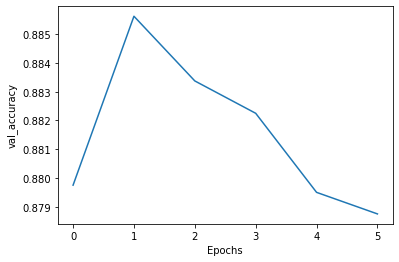

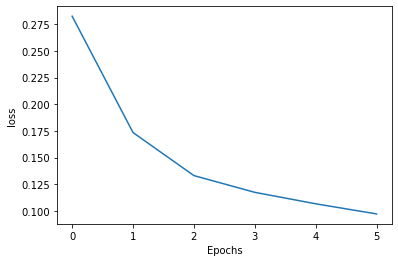

In [27]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'val_accuracy')
plot_graphs(history, 'loss')

Now, we can predict the values for the test set.

In [28]:
translated_test.head()

,id,content,lang,lang_name,country,translated_comment,cleaned_text,neg_pol,neutral_pol,pos_pol,compound_pol,comment_len
0,0,Doctor Who adlı viki başlığına 12. doctor olar...,tr,Turkish,Turkey,Title named Doctor Who wiki 12. doctor has add...,title named doctor who wiki doctor has added h...,0.000,0.912,0.088,0.4019,29
1,1,"Вполне возможно, но я пока не вижу необходимо...",ru,Russian,Russia,"It is possible, but I don't see the need to a...",it is possible but i do not see the need to al...,0.000,0.823,0.177,0.9620,92
2,2,"Quindi tu sei uno di quelli conservativi , ...",it,Italian,Italy,"Then you're one of those conservative , who wo...",then you are one of those conservative who wou...,0.079,0.797,0.124,0.4041,54
3,3,Malesef gerçekleştirilmedi ancak şöyle bir şey...,tr,Turkish,Turkey,"Unfortunately, it was not performed, but had s...",unfortunately it was not performed but had som...,0.031,0.762,0.207,0.9806,120
4,4,:Resim:Seldabagcan.jpg resminde kaynak sorunu ...,tr,Turkish,Turkey,:Resim:Seldabagcan.jpg the image of the source...,resim seldabagcan jpg the image of the source ...,0.040,0.870,0.090,0.8758,245


In [29]:
test_toxic = model.predict(translated_test.cleaned_text.values)

In [30]:
evaluation = translated_test.id.copy().to_frame()
evaluation['toxic'] = np.round(test_toxic)
evaluation

,id,toxic
0,0,0.0
1,1,0.0
2,2,1.0
3,3,0.0
4,4,0.0
...,...,...
63807,63807,1.0
63808,63808,0.0
63809,63809,0.0
63810,63810,0.0


In [31]:
evaluation.to_csv("submission.csv", index=False)